# 11주차 실습문제 - 표본 추출 시뮬레이션 및 표본 통계량

제출시 HTML(.html) 형식으로 다운로드한 뒤, 올려주세요.

In [1]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 표시 자릿수 지정
%precision 3
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

data = pd.read_csv("health2018.csv")
height = data[data.sex == 'F'].height
height

2       157.7
3       151.0
4       146.1
5       157.2
7       168.8
        ...  
5958    157.9
5963    159.8
5964    156.9
5965    145.2
5967    163.1
Name: height, Length: 3332, dtype: float64

---

## 1. 모집단의 분포 확인
### 1-1. 모집단 height의 평균과 표준편차를 각각 m, sig로 저장하고 출력하시오.

In [2]:
m = height.mean()
sig = height.std()
print(m, sig)

157.53676470588263 6.583447816050603


### 1-2. 모집단(fish)의 분포를 히스토그램으로 그리고 위에서 구한 모집단의 평균과 표준편차에 따른 정규분포 곡선을 겹쳐 그리시오.
히스토그램의 y축을 비율로 둘 것 (norm_hist = True)

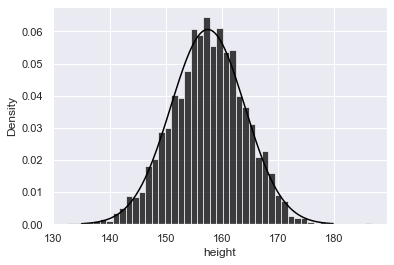

In [3]:
sns.histplot(height, kde = False, stat = 'density', color = 'black')
x = np.arange(start = 135, stop = 180, step = 0.1)
plt.plot(x, stats.norm.pdf(x = x, loc = m, scale = sig), color = 'black')

---

## 2.표본 추출 시뮬레이션
### 2-1. 모집단 height에서 샘플을 100개씩 10000번 뽑아 '표본평균의 평균'과 '표본평균의 표준편차'를 구하시오.
표본평균의 평균과 표준편차는 모집단의 평균, 표준편차와 각각 어떤 관계에 있는가?

In [4]:
np.random.seed(1)
sample_mean = np.zeros(10000)
for i in range (0, 10000):
    sample = np.random.choice(height, size = 100, replace = False)
    sample_mean[i] = sample.mean()

print(np.mean(sample_mean), np.std(sample_mean, ddof=1))

157.5276184 0.641892477114865


### 2-2. 모집단 height에서 표본평균을 여러 번 계산하는 함수 calc_sample_mean을 작성하시오 (샘플사이즈 n_sample일 때, 표본 평균값을 n_trial 번 계산해서 array로 반환). 

In [5]:
def calc_sample_mean(n_sample, n_trial):
    sample_mean = np.zeros(n_trial)
    for i in range(n_trial):
        sample = np.random.choice(height, size = n_sample, replace = False)
        sample_mean[i] = sample.mean()
    return(sample_mean)    

### 2-3. 모집단 height에서 샘플 사이즈를 2, 4, 6, ..., 100까지 늘려가면서, 표본평균을 50번씩 구해 표본평균의 표준편차(ddof = 1)가 어떻게 변해가는지 그래프로 그리시오. 또한 이론 상의 표준오차를 점선으로 그려 비교하시오.

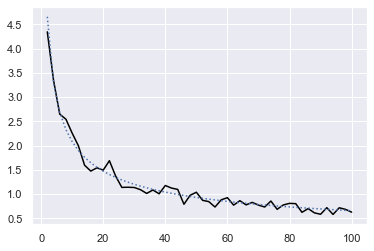

In [6]:
np.random.seed(1)
sample_size = np.arange(start = 2, stop = 102, step = 2)
sample_mean_std = np.zeros(len(sample_size))
for i in range(0, len(sample_size)):
    sample_mean = calc_sample_mean(sample_size[i], 50)
    sample_mean_std[i] = np.std(sample_mean, ddof=1)
plt.plot(sample_size, sample_mean_std, color = 'black')

standard_error = sig / np.sqrt(sample_size)
plt.plot(sample_size, standard_error, linestyle = 'dotted')

---

## 3. 하측확률, 퍼센트포인트와 순위 추정
### 3-1. 모집단 height에서 하위 25%와 상위 25% 순위에 해당하는 키가 얼마인지 찾으시오.
힌트: np.percentile() 함수 사용

In [7]:
np.percentile(height, [25, 75])

array([153.2, 162. ])

### 3-2. 정규분포(또는 t분포)를 사용하여, height 분포에서 하위 25%와 상위 25% 순위에 해당하는 값을 추정하시오.
힌트: stats.norm.ppf() 또는 stats.t.pdf() 사용

In [8]:
stats.norm.ppf(loc = m, scale = sig, q = [0.25, 0.75])

array([153.096, 161.977])

### 3-3.input() 함수를 이용해 키를 입력받고, 정규분포(또는 t분포) 기반으로 백분위 순위를 구해 출력하라.
힌트: stats.norm.cdf() 또는 stats.t.cdf() 활용

In [11]:
h = input("키(cm)를 입력하십시오:")
percentile = stats.norm.cdf(loc = m, scale = sig, x =float(h))
print(percentile * 100)

키(cm)를 입력하십시오:162
75.10976685784799
